In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#REPPU
mlat = np.linspace(53.1, 89.7, 30) #30 intervals between 53.1° to 89.7°
mlt= np.linspace(1.6, 357.6, 80) #80 intervals between 1.6° to 357.6°

#AMPERE
#mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

def calculate_delta(lat1, lon1, lat2, lon2):
    R_E = 6371.0 * 1e3 #meters

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    delta_x = (dlat / 360)*2*np.pi*R_E
    delta_y = (dlon / 360)*2*np.pi*R_E*np.sin(lat1_rad)

    return delta_x, delta_y

# Initialize a 50x24 grid for areas
areas = np.zeros((29, 79))

# Loop through latitude and longitude pairs to calculate areas
for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

#divide area values by 1e3
areas = areas / 1e6

<AxesSubplot:>

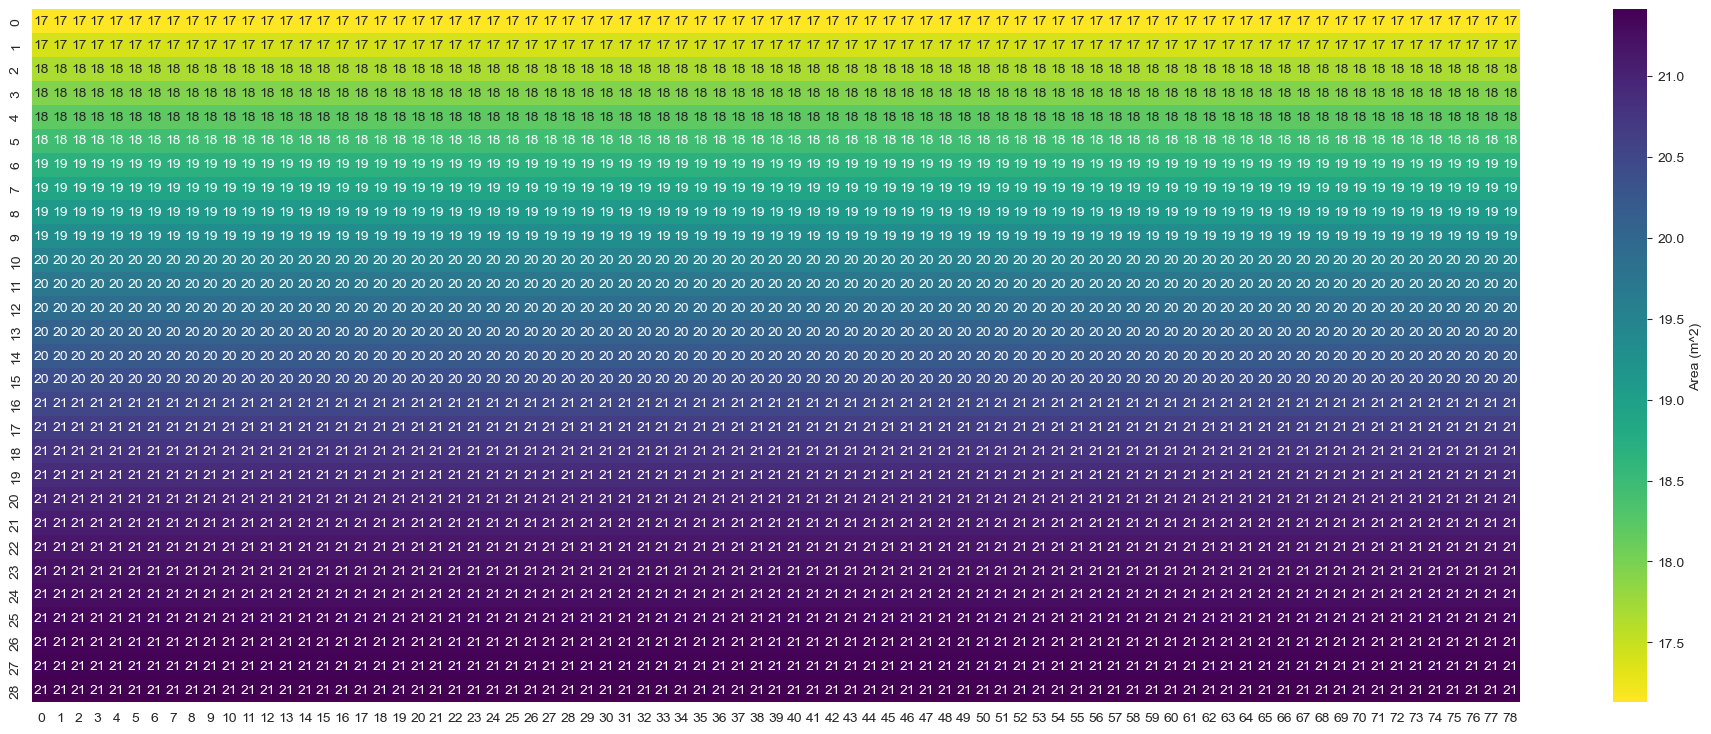

In [9]:
fig, ax = plt.subplots(figsize=(24, 9))
sns.heatmap(areas, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Area (m^2)'}, fmt='.0f', annot=True)
#set y ticks labels to be from 90 down to 40
#ax.set_yticklabels(np.flip(np.arange(41, 90, 1)))

<AxesSubplot:>

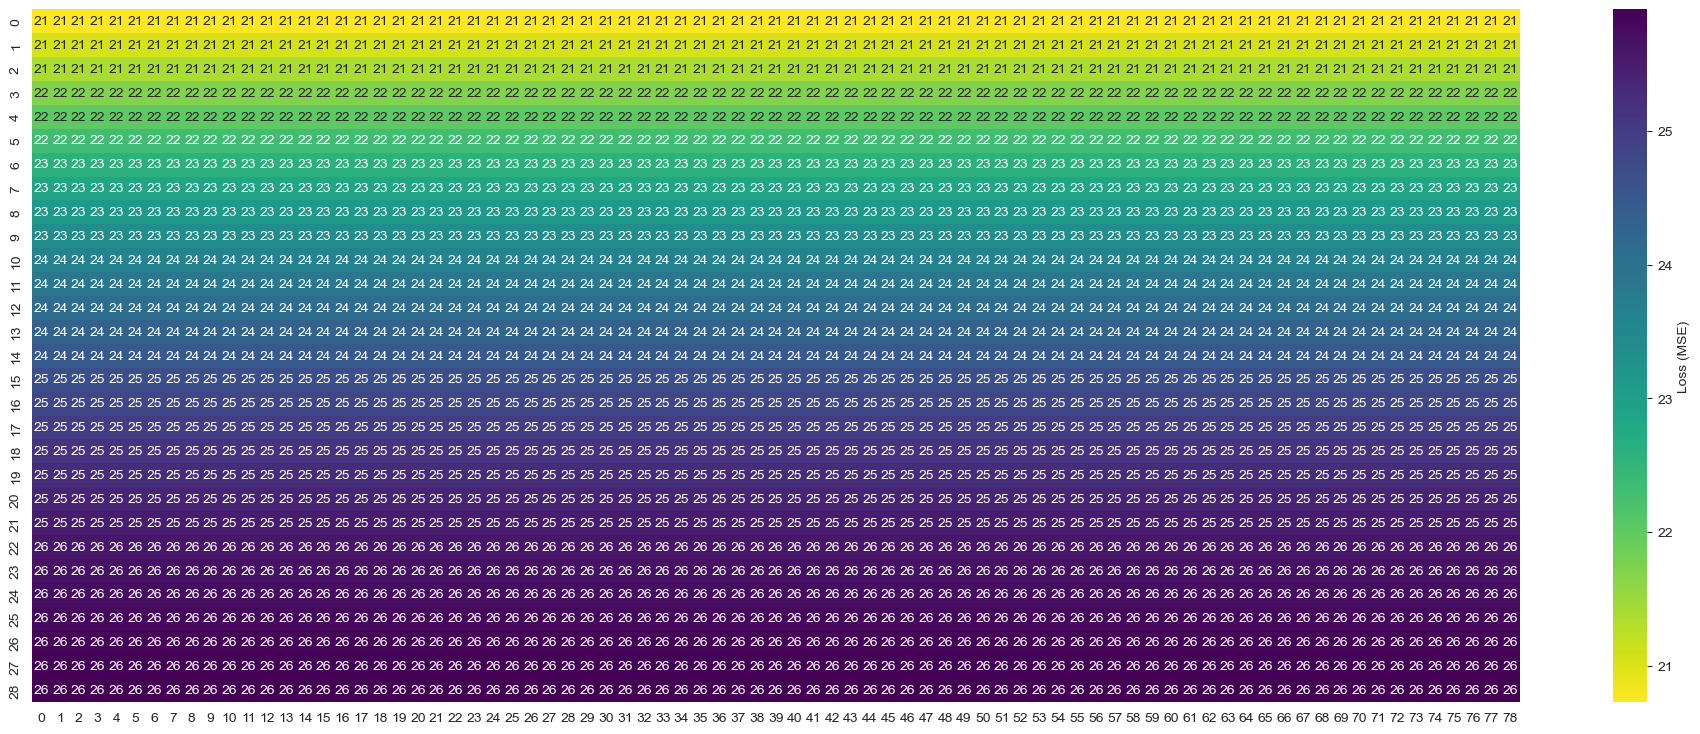

In [8]:
def weighted_loss(prediction, target, weights):
    loss = (prediction - target) ** 2 #MSE

    weighted_loss = loss * weights
    
    return weighted_loss

target = np.ones((29, 79))
prediction = target + 1.1
weights = areas

weight_loss = weighted_loss(prediction, target, weights)
fig, ax = plt.subplots(figsize=(24, 9))
sns.heatmap(weight_loss, ax=ax, cmap='viridis_r', cbar_kws={'label': 'Loss (MSE)'}, fmt='.0f', annot=True)
#ax.set_yticklabels(np.flip(np.arange(53, 89, 1)))


In [11]:
1 - 1

0